In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
matches = pd.read_csv('../data/merged_after_odds.csv', index_col=False)



In [3]:
required_columns = [
    "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG"
]
missing_columns = [col for col in required_columns if col not in matches.columns]
if missing_columns:
    raise ValueError(f"Missing required columns in source data: {missing_columns}")

initial_rows = len(matches)
print(f"Initial rows: {initial_rows}")

# Deduplicate fixtures based on unique date/home/away combination
duplicate_mask = matches.duplicated(subset=["Date", "HomeTeam", "AwayTeam"], keep="first")
duplicates_removed = int(duplicate_mask.sum())
if duplicates_removed:
    matches = matches.loc[~duplicate_mask].copy()
    print(f"Removed {duplicates_removed} duplicated fixture rows; {len(matches)} rows remain.")
else:
    print("No duplicated fixture rows detected.")

# Basic sanity checks for match stat completeness (odds excluded)
quality_columns = ["FTHG", "FTAG", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "AY", "HR", "AR"]
missing_rows_mask = matches[quality_columns].isna().any(axis=1)
missing_rows = int(missing_rows_mask.sum())
if missing_rows:
    print(f"Removing {missing_rows} rows with missing crucial stats; displaying column counts below.")
    display(matches.loc[missing_rows_mask, quality_columns].isna().sum())
    matches = matches.loc[~missing_rows_mask].copy()
    print(f"Rows remaining after dropping missing stats: {len(matches)}")
else:
    print("No missing crucial stats detected.")

# Ensure Date parsed correctly and drop rows with invalid dates
matches["Date"] = pd.to_datetime(matches["Date"], errors="coerce")
invalid_dates = int(matches["Date"].isna().sum())
if invalid_dates:
    matches = matches.dropna(subset=["Date"])
    print(f"Removed {invalid_dates} rows with invalid dates; {len(matches)} rows remain.")
else:
    print("All rows contain valid dates.")


Initial rows: 7260
No duplicated fixture rows detected.
No missing crucial stats detected.
All rows contain valid dates.


In [4]:
# Additional sanity checks on numeric ranges and team label consistency
count_columns = [
    "FTHG", "FTAG", "HS", "AS", "HST", "AST", "HC", "AC",
    "HF", "AF", "HY", "AY", "HR", "AR"
]
negative_mask = (matches[count_columns] < 0)
if negative_mask.any().any():
    problematic_cols = negative_mask.any(axis=0)
    raise ValueError(f"Negative values found in match stats: {list(problematic_cols[problematic_cols].index)}")
else:
    print("Verified non-negative counts for goals, shots, cards, and fouls.")

home_teams = set(matches["HomeTeam"].unique())
away_teams = set(matches["AwayTeam"].unique())
extra_home = sorted(home_teams - away_teams)
extra_away = sorted(away_teams - home_teams)
if extra_home or extra_away:
    print("Warning: Team naming mismatch detected between home and away columns.")
    display({"only_home": extra_home, "only_away": extra_away})
else:
    print("Home/Away team name sets match exactly.")


Verified non-negative counts for goals, shots, cards, and fouls.
Home/Away team name sets match exactly.


In [5]:
# Persist a stable match identifier for downstream joins
matches = matches.sort_values("Date").reset_index(drop=True)
matches["match_id"] = matches.index
matches.head()


,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A,match_id
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,18,17,2,3,0,0,NaN,NaN,NaN,0
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,14,14,1,1,0,0,NaN,NaN,NaN,1
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,12,8,3,1,0,0,NaN,NaN,NaN,2
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,14,15,0,2,0,0,NaN,NaN,NaN,3
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,11,12,3,2,0,0,NaN,NaN,NaN,4


In [6]:
matches.shape


(7260, 25)

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7260 non-null   datetime64[ns]
 1   Div       7260 non-null   object        
 2   HomeTeam  7260 non-null   object        
 3   AwayTeam  7260 non-null   object        
 4   FTHG      7260 non-null   int64         
 5   FTAG      7260 non-null   int64         
 6   HTHG      7260 non-null   int64         
 7   HTAG      7260 non-null   int64         
 8   FTR       7260 non-null   object        
 9   HS        7260 non-null   int64         
 10  AS        7260 non-null   int64         
 11  HST       7260 non-null   int64         
 12  AST       7260 non-null   int64         
 13  HC        7260 non-null   int64         
 14  AC        7260 non-null   int64         
 15  HF        7260 non-null   int64         
 16  AF        7260 non-null   int64         
 17  HY        7260

In [8]:
# Preview shown earlier; redundant cell removed.

In [9]:
# Tail preview omitted to reduce noise.

In [10]:
# Removed unused exploratory calculation.

In [11]:
# Shape already captured earlier.

In [12]:
matches['HomeTeam'].value_counts()

HomeTeam
Arsenal             364
Chelsea             364
Everton             364
Man United          363
Liverpool           362
Tottenham           361
Man City            344
Newcastle           326
Aston Villa         317
West Ham            307
Sunderland          266
Fulham              254
Southampton         229
West Brom           228
Bolton              209
Blackburn           209
Stoke               190
Middlesbrough       171
Leicester           154
Wigan               152
Crystal Palace      134
Swansea             133
Birmingham          133
Charlton            133
Portsmouth          133
Norwich             108
Burnley              97
Watford              97
Wolves               97
Hull                 95
Bournemouth          79
Leeds                76
QPR                  57
Reading              57
Derby                57
Brighton             39
Ipswich              38
Sheffield United     32
Cardiff              28
Huddersfield         27
Coventry             19
Bradfor

### The data type of each columns


In [13]:
# Data types captured above via matches.info().

In [14]:
# Date summary available via validations above.

In [15]:
# Duplicate dtype display removed.


In [16]:
# Preview already shown once.

In [17]:
# Legacy home/away reshaping removed – matches_long below now powers the modeling pipeline.


In [18]:
teams_index = pd.Index(pd.concat([matches["HomeTeam"], matches["AwayTeam"]], ignore_index=True).unique())
team_code_map = {team: idx for idx, team in enumerate(sorted(teams_index))}
matches["home_code"] = matches["HomeTeam"].map(team_code_map)
matches["away_code"] = matches["AwayTeam"].map(team_code_map)
matches["day_code"] = matches["Date"].dt.dayofweek

In [19]:
# Encoded team/day features above.

In [20]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,match_id,home_code,away_code,day_code
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,3,0,0,NaN,NaN,NaN,0,0,25,0
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,1,0,0,NaN,NaN,NaN,1,12,23,0
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,1,0,0,NaN,NaN,NaN,2,36,22,0
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,2,0,0,NaN,NaN,NaN,3,0,34,5
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,2,0,0,NaN,NaN,NaN,4,7,13,5


In [21]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,match_id,home_code,away_code,day_code
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,1,0,0,1.85,3.8,4.00,7255,16,8,6
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,3,0,1,4.10,3.9,1.80,7256,14,0,6
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,3,0,0,1.28,5.5,11.00,7257,12,9,6
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,1,0,0,2.60,3.3,2.70,7258,6,39,1
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,1,0,0,13.00,8.5,1.16,7259,1,24,1


In [22]:
matches.shape

(7260, 28)

## Created a result column to add W for Home Win and L for Home Loss

In [23]:
matches["result"] = matches.apply(
    lambda row: "W" if row["FTHG"] > row["FTAG"] 
                else ("L" if row["FTHG"] < row["FTAG"] else "D"),
    axis=1
)

In [24]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HR,AR,B365H,B365D,B365A,match_id,home_code,away_code,day_code,result
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,0,0,NaN,NaN,NaN,0,0,25,0,W
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,0,0,NaN,NaN,NaN,1,12,23,0,W
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,0,0,NaN,NaN,NaN,2,36,22,0,D
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,0,0,NaN,NaN,NaN,3,0,34,5,W
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,0,0,NaN,NaN,NaN,4,7,13,5,W


In [25]:
matches['target'] = (matches['result']== 'W').astype('int')

In [26]:
label_map = {"W": 0, "D": 1, "L": 2}
matches["result_label"] = matches["result"].map(label_map)
label_map


{'W': 0, 'D': 1, 'L': 2}

In [27]:
# Map match results into multi-class labels for home win / draw / away win
label_map = {"W": 0, "D": 1, "L": 2}
matches["result_label"] = matches["result"].map(label_map)
label_map


{'W': 0, 'D': 1, 'L': 2}

In [28]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,B365H,B365D,B365A,match_id,home_code,away_code,day_code,result,target,result_label
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,NaN,NaN,NaN,0,0,25,0,W,1,0
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,NaN,NaN,NaN,1,12,23,0,W,1,0
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,NaN,NaN,NaN,2,36,22,0,D,0,1
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,NaN,NaN,NaN,3,0,34,5,W,1,0
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,NaN,NaN,NaN,4,7,13,5,W,1,0


In [29]:
matches.tail()


,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,B365H,B365D,B365A,match_id,home_code,away_code,day_code,result,target,result_label
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,1.85,3.8,4.00,7255,16,8,6,W,1,0
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,4.10,3.9,1.80,7256,14,0,6,D,0,1
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,1.28,5.5,11.00,7257,12,9,6,W,1,0
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,2.60,3.3,2.70,7258,6,39,1,L,0,2
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,13.00,8.5,1.16,7259,1,24,1,L,0,2


In [30]:
matches[["match_id", "Date"]].tail()

,match_id,Date
7255,7255,2020-11-01
7256,7256,2020-11-01
7257,7257,2020-11-01
7258,7258,2020-12-01
7259,7259,2020-12-01


In [31]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,B365H,B365D,B365A,match_id,home_code,away_code,day_code,result,target,result_label
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,1.85,3.8,4.00,7255,16,8,6,W,1,0
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,4.10,3.9,1.80,7256,14,0,6,D,0,1
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,1.28,5.5,11.00,7257,12,9,6,W,1,0
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,2.60,3.3,2.70,7258,6,39,1,L,0,2
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,13.00,8.5,1.16,7259,1,24,1,L,0,2


In [32]:
matches.dtypes

Date            datetime64[ns]
Div                     object
HomeTeam                object
AwayTeam                object
FTHG                     int64
FTAG                     int64
HTHG                     int64
HTAG                     int64
FTR                     object
HS                       int64
AS                       int64
HST                      int64
AST                      int64
HC                       int64
AC                       int64
HF                       int64
AF                       int64
HY                       int64
AY                       int64
HR                       int64
AR                       int64
B365H                  float64
B365D                  float64
B365A                  float64
match_id                 int64
home_code                int64
away_code                int64
day_code                 int32
result                  object
target                   int64
result_label             int64
dtype: object

In [33]:
# training on 2000–2016, testing on 2017–2018
train = matches[matches["Date"] < "2017-01-01"]
test  = matches[matches["Date"] >= "2017-01-01"]



In [34]:
matches.columns.tolist()


['Date',
 'Div',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'match_id',
 'home_code',
 'away_code',
 'day_code',
 'result',
 'target',
 'result_label']

In [35]:
train.shape

(6268, 31)

In [36]:
test.shape

(992, 31)

In [37]:
predictors = ["home_code", "away_code", "day_code"]

In [38]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = xgb.XGBClassifier(n_estimators=200, random_state= 42, eta = 0.01)



In [40]:
model.fit(train[predictors], train["target"])


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
preds = model.predict(test[predictors])


preds

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit

In [43]:
acc = accuracy_score(test["target"], preds)


In [44]:
acc

0.6330645161290323

In [45]:
combined = pd.DataFrame(dict(actual = test["target"], prediction = preds))

In [46]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,430,109
1,255,198


In [47]:
# Metrics imported above.

In [48]:
# Placeholder – the multi-class section has been moved below the feature-engineering pipeline so
# all required variables (matches_model, feature_cols, etc.) are defined before use.


## Multi-class kick-off style predictions


In [49]:
# Placeholder for relocated multi-class feature prep.


In [50]:
# Placeholder – multi-class split moved below.


In [51]:
# Placeholder – see new multi-class predictor cell below.


In [52]:
# Placeholder – multi-class model training moved below.


In [53]:
# Placeholder – moved below with new evaluation cells.


In [54]:
# Placeholder – classification report now printed in relocated section.


In [55]:
# Placeholder – confusion-matrix visualization moved below.


In [56]:
# Placeholder – probability table moved below.


In [57]:
# Placeholder – see relocated results preview.


In [58]:
precision_score(test["target"], preds)

0.6449511400651465

#### This function returns the matches played by a specific team both home or away

In [59]:
def get_team_matches(df, team_name):
    return df[(df["HomeTeam"] == team_name) | (df["AwayTeam"] == team_name)]



In [60]:
liverpool_matches = get_team_matches(matches, "Liverpool")

liverpool_matches

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,B365H,B365D,B365A,match_id,home_code,away_code,day_code,result,target,result_label
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,NaN,NaN,NaN,1,12,23,0,W,1,0
7,2000-02-12,E0,Liverpool,Charlton,3,0,1,0,H,13,...,NaN,NaN,NaN,7,23,11,5,W,1,0
15,2000-04-11,E0,Leeds,Liverpool,4,3,1,2,H,10,...,NaN,NaN,NaN,15,21,23,1,W,1,0
30,2000-06-09,E0,Liverpool,Aston Villa,3,1,3,0,H,11,...,NaN,NaN,NaN,30,23,1,4,W,1,0
37,2000-08-19,E0,Liverpool,Bradford,1,0,0,0,H,16,...,NaN,NaN,NaN,37,23,7,5,W,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,5.75,3.80,1.61,7235,43,23,3,L,0,2
7236,2020-01-29,E0,West Ham,Liverpool,0,2,0,1,A,7,...,8.50,5.50,1.33,7236,41,23,2,L,0,2
7237,2020-02-01,E0,Liverpool,Sheffield United,2,0,1,0,H,19,...,1.20,6.50,13.00,7237,23,33,5,W,1,0
7241,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,11.00,6.25,1.25,7241,29,23,5,L,0,2


In [61]:
# Build a team-centric view with mirrored home/away stats
home = matches.rename(columns={
    "HomeTeam": "Team",
    "AwayTeam": "Opponent",
    "FTHG": "gf",
    "FTAG": "ga"
}).copy()
home["Venue"] = "H"
home["venue_code"] = 0
home["match_id"] = matches["match_id"]
home["team_code"] = matches["home_code"]
home["opponent_code"] = matches["away_code"]
home["day_code"] = home["Date"].dt.dayofweek

away = matches.rename(columns={
    "AwayTeam": "Team",
    "HomeTeam": "Opponent",
    "FTAG": "gf",
    "FTHG": "ga"
}).copy()
away["Venue"] = "A"
away["venue_code"] = 1
away["match_id"] = matches["match_id"]
away["team_code"] = matches["away_code"]
away["opponent_code"] = matches["home_code"]
away["day_code"] = away["Date"].dt.dayofweek

# Map match statistics into a team/opponent perspective
home["shots_for"], home["shots_against"] = home["HS"], home["AS"]
home["shots_on_target_for"], home["shots_on_target_against"] = home["HST"], home["AST"]
home["corners_for"], home["corners_against"] = home["HC"], home["AC"]
home["fouls_for"], home["fouls_against"] = home["HF"], home["AF"]
home["yellows_for"], home["yellows_against"] = home["HY"], home["AY"]
home["reds_for"], home["reds_against"] = home["HR"], home["AR"]

away["shots_for"], away["shots_against"] = away["AS"], away["HS"]
away["shots_on_target_for"], away["shots_on_target_against"] = away["AST"], away["HST"]
away["corners_for"], away["corners_against"] = away["AC"], away["HC"]
away["fouls_for"], away["fouls_against"] = away["AF"], away["HF"]
away["yellows_for"], away["yellows_against"] = away["AY"], away["HY"]
away["reds_for"], away["reds_against"] = away["AR"], away["HR"]

matches_long = pd.concat([home, away], ignore_index=True)
matches_long["goal_diff"] = matches_long["gf"] - matches_long["ga"]
matches_long["team_result"] = np.where(
    matches_long["gf"] > matches_long["ga"], "W",
    np.where(matches_long["gf"] < matches_long["ga"], "L", "D")
)
matches_long["team_target"] = (matches_long["team_result"] == "W").astype(int)
matches_long["team_points"] = matches_long["team_result"].map({"W": 3, "D": 1, "L": 0})
matches_long["season"] = matches_long["Date"].apply(lambda d: d.year if d.month >= 8 else d.year - 1)
matches_long = matches_long.sort_values(["Team", "Date"]).reset_index(drop=True)
matches_long["matchday"] = matches_long.groupby(["Team", "season"]).cumcount() + 1
matches_long["matches_played"] = matches_long["matchday"] - 1
matches_long["season_points_to_date"] = matches_long.groupby(["Team", "season"])["team_points"].cumsum() - matches_long["team_points"]
matches_long["season_goal_diff_to_date"] = matches_long.groupby(["Team", "season"])["goal_diff"].cumsum() - matches_long["goal_diff"]
matches_long["season_points_rate"] = matches_long.apply(
    lambda row: row["season_points_to_date"] / row["matches_played"] if row["matches_played"] > 0 else 0,
    axis=1
)
matches_long["days_since_last"] = matches_long.groupby("Team")["Date"].diff().dt.days.fillna(7)
matches_long["is_weekend"] = matches_long["Date"].dt.dayofweek.isin([5, 6]).astype(int)

# Opponent pre-match strength features
opp_features = matches_long[
    [
        "match_id", "Team", "season_points_to_date", "season_goal_diff_to_date",
        "matches_played", "season_points_rate"
    ]
].rename(columns={
    "Team": "Opponent",
    "season_points_to_date": "opp_season_points_to_date",
    "season_goal_diff_to_date": "opp_season_goal_diff_to_date",
    "matches_played": "opp_matches_played",
    "season_points_rate": "opp_season_points_rate"
})

matches_long = matches_long.merge(opp_features, on=["match_id", "Opponent"], how="left")
matches_long[[
    "opp_season_points_to_date", "opp_season_goal_diff_to_date",
    "opp_matches_played", "opp_season_points_rate"
]] = matches_long[[
    "opp_season_points_to_date", "opp_season_goal_diff_to_date",
    "opp_matches_played", "opp_season_points_rate"
]].fillna(0)


In [62]:
# Venue-encoding column removed (unused downstream).

In [63]:
rolling_windows = (3, 5, 10)
base_stat_cols = [
    "gf", "ga", "shots_for", "shots_against", "shots_on_target_for",
    "shots_on_target_against", "corners_for", "corners_against", "fouls_for",
    "fouls_against", "yellows_for", "yellows_against", "reds_for",
    "reds_against", "goal_diff", "team_points"
]

def add_rolling_features(group):
    group = group.sort_values("Date").copy()
    for window in rolling_windows:
        rolled = group[base_stat_cols].rolling(window, closed="left").mean()
        rolled.columns = [f"{col}_roll{window}" for col in base_stat_cols]
        group[rolled.columns] = rolled
        group[f"wins_last_{window}"] = group["team_target"].rolling(window, closed="left").sum()
        group[f"points_last_{window}"] = group["team_points"].rolling(window, closed="left").sum()
    group["days_since_last"] = group["days_since_last"].fillna(group["days_since_last"].median())
    return group

In [64]:
base_stat_cols

['gf',
 'ga',
 'shots_for',
 'shots_against',
 'shots_on_target_for',
 'shots_on_target_against',
 'corners_for',
 'corners_against',
 'fouls_for',
 'fouls_against',
 'yellows_for',
 'yellows_against',
 'reds_for',
 'reds_against',
 'goal_diff',
 'team_points']

In [65]:
rolling_windows

(3, 5, 10)

In [66]:
group_matches = matches_long.groupby("Team") 

In [67]:
group = group_matches.get_group("Arsenal")
group

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,matches_played,season_points_to_date,season_goal_diff_to_date,season_points_rate,days_since_last,is_weekend,opp_season_points_to_date,opp_season_goal_diff_to_date,opp_matches_played,opp_season_points_rate
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,0,0,0,0.000000,7.0,0,0,0,0,0.000000
1,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,1,3,1,3.000000,33.0,1,0,0,0,0.000000
2,2000-04-11,E0,Arsenal,Middlesbrough,1,0,0,1,A,4,...,2,6,2,3.000000,59.0,0,0,-1,1,0.000000
3,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,3,9,3,3.000000,59.0,0,6,3,3,2.000000
4,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,0,0,0,0.000000,71.0,1,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2020-01-18,E0,Arsenal,Sheffield United,1,1,1,0,D,11,...,16,21,-2,1.312500,17.0,1,27,4,17,1.588235
722,2020-01-21,E0,Arsenal,Chelsea,2,2,1,0,D,19,...,17,22,-2,1.294118,3.0,0,28,3,19,1.473684
723,2020-02-02,E0,Arsenal,Burnley,0,0,0,0,D,15,...,18,23,-2,1.277778,12.0,1,27,3,19,1.421053
724,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,19,24,-2,1.263158,14.0,1,21,-16,21,1.000000


In [68]:
add_rolling_features(group).head()

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,fouls_for_roll10,fouls_against_roll10,yellows_for_roll10,yellows_against_roll10,reds_for_roll10,reds_against_roll10,goal_diff_roll10,team_points_roll10,wins_last_10,points_last_10
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-11,E0,Arsenal,Middlesbrough,1,0,0,1,A,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
matches_rolling = matches_long.groupby("Team", group_keys=False).apply(add_rolling_features)
max_window = max(rolling_windows)
required_roll_cols = [f"{col}_roll{max_window}" for col in base_stat_cols]
matches_rolling = matches_rolling.dropna(subset=required_roll_cols).reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20052\1154329781.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches_long.groupby("Team", group_keys=False).apply(add_rolling_features)


In [70]:
matches_rolling

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,fouls_for_roll10,fouls_against_roll10,yellows_for_roll10,yellows_against_roll10,reds_for_roll10,reds_against_roll10,goal_diff_roll10,team_points_roll10,wins_last_10,points_last_10
0,2000-09-23,E0,Arsenal,Ipswich,1,1,0,0,D,17,...,15.1,14.4,1.0,2.2,0.2,0.3,1.2,2.3,7.0,23.0
1,2000-10-14,E0,Arsenal,Aston Villa,1,0,0,0,H,16,...,14.6,13.5,1.0,2.0,0.2,0.3,1.1,2.1,6.0,21.0
2,2000-10-21,E0,Arsenal,West Ham,2,1,0,2,A,11,...,14.4,14.0,1.1,2.2,0.2,0.4,1.1,2.1,6.0,21.0
3,2000-10-28,E0,Arsenal,Man City,5,0,1,0,H,22,...,14.4,14.5,1.0,2.2,0.2,0.3,1.1,2.1,6.0,21.0
4,2000-11-11,E0,Arsenal,Derby,0,0,0,0,D,15,...,12.8,14.2,0.9,2.2,0.2,0.4,1.6,2.3,7.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14075,2020-01-02,E0,Wolves,Man United,0,0,0,0,D,15,...,11.1,9.5,2.1,2.0,0.0,0.4,0.1,1.5,4.0,15.0
14076,2020-01-18,E0,Wolves,Southampton,3,2,2,0,A,11,...,10.9,10.1,1.9,2.0,0.0,0.4,0.0,1.3,3.0,13.0
14077,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,11.1,9.7,1.7,2.0,0.0,0.4,0.1,1.5,4.0,15.0
14078,2020-02-14,E0,Wolves,Leicester,0,0,0,0,D,15,...,10.2,10.0,1.5,1.9,0.0,0.3,0.0,1.4,4.0,14.0


In [71]:
matches_rolling = matches_rolling.sort_values(["Date", "Team"])

In [72]:
rolling_feature_cols = [f"{col}_roll{window}" for col in base_stat_cols for window in rolling_windows]
aggregate_cols = [f"wins_last_{window}" for window in rolling_windows] + [f"points_last_{window}" for window in rolling_windows]
feature_cols = [
    "venue_code", "day_code", "team_code", "opponent_code",
    "season_points_to_date", "season_goal_diff_to_date", "season_points_rate",
    "matches_played", "opp_season_points_to_date", "opp_season_goal_diff_to_date",
    "opp_matches_played", "opp_season_points_rate", "days_since_last", "is_weekend"
] + rolling_feature_cols + aggregate_cols

matches_rolling[feature_cols] = matches_rolling[feature_cols].fillna(0)
matches_model = matches_rolling.dropna(subset=feature_cols + ["team_target"]).copy()
len(feature_cols)

68

In [73]:
def run_model_pipeline(data, feature_columns, split_date="2016-08-01"):
    data = data.sort_values("Date").copy()
    train = data[data["Date"] < split_date]
    test = data[data["Date"] >= split_date]

    tuned_model = xgb.XGBClassifier(
        n_estimators=600,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        gamma=0.2,
        reg_lambda=1.0,
        reg_alpha=0.1,
        random_state=42,
        n_jobs=-1
    )

    tuned_model.fit(train[feature_columns], train["team_target"])
    preds = tuned_model.predict(test[feature_columns])
    proba = tuned_model.predict_proba(test[feature_columns])[:, 1]

    metrics = {
        "accuracy": accuracy_score(test["team_target"], preds),
        "precision": precision_score(test["team_target"], preds),
        "recall": recall_score(test["team_target"], preds),
        "f1": f1_score(test["team_target"], preds)
    }

    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = []
    for train_idx, val_idx in tscv.split(train):
        cv_model = xgb.XGBClassifier(
            n_estimators=400,
            max_depth=4,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_weight=3,
            random_state=42,
            n_jobs=-1
        )
        X_train_cv = train.iloc[train_idx][feature_columns]
        y_train_cv = train.iloc[train_idx]["team_target"]
        X_val_cv = train.iloc[val_idx][feature_columns]
        y_val_cv = train.iloc[val_idx]["team_target"]
        cv_model.fit(X_train_cv, y_train_cv)
        val_preds = cv_model.predict(X_val_cv)
        cv_scores.append(accuracy_score(y_val_cv, val_preds))

    metrics["cv_mean_accuracy"] = float(np.mean(cv_scores))
    metrics["cv_std_accuracy"] = float(np.std(cv_scores))

    results = pd.DataFrame({
        "actual": test["team_target"],
        "prediction": preds,
        "probability": proba
    }, index=test.index)

    return tuned_model, results, metrics, test

In [74]:
model, combined, metrics, test_split = run_model_pipeline(matches_model, feature_cols)
metrics

{'accuracy': 0.6825601374570447,
 'precision': 0.6209150326797386,
 'recall': 0.42841037204058624,
 'f1': 0.5070046697798533,
 'cv_mean_accuracy': 0.6718079673135853,
 'cv_std_accuracy': 0.009768613046786704}

Combined predictions with probabilities

In [75]:
combined

,actual,prediction,probability
12436,0,0,0.206660
12253,0,1,0.726484
10388,1,0,0.411689
7498,0,1,0.796138
599,0,0,0.441293
...,...,...,...
6221,0,1,0.546471
7615,1,0,0.462124
1339,0,0,0.328880
2585,0,0,0.097436


In [76]:
metrics

{'accuracy': 0.6825601374570447,
 'precision': 0.6209150326797386,
 'recall': 0.42841037204058624,
 'f1': 0.5070046697798533,
 'cv_mean_accuracy': 0.6718079673135853,
 'cv_std_accuracy': 0.009768613046786704}

In [77]:
combined = combined.merge(
    matches_model.loc[:, ["Date", "Team", "Opponent", "FTR", "match_id"]],
    left_index=True,
    right_index=True,
    how="left"
)

In [78]:
combined

,actual,prediction,probability,Date,Team,Opponent,FTR,match_id
12436,0,0,0.206660,2016-08-05,Watford,Liverpool,H,6088
12253,0,1,0.726484,2016-08-05,Tottenham,Southampton,A,6087
10388,1,0,0.411689,2016-08-05,Southampton,Tottenham,A,6087
7498,0,1,0.796138,2016-08-05,Man City,Arsenal,D,6086
599,0,0,0.441293,2016-08-05,Arsenal,Man City,D,6086
...,...,...,...,...,...,...,...,...
6221,0,1,0.546471,2020-11-01,Leicester,Southampton,A,7254
7615,1,0,0.462124,2020-12-01,Man City,Aston Villa,A,7259
1339,0,0,0.328880,2020-12-01,Aston Villa,Man City,A,7259
2585,0,0,0.097436,2020-12-01,Bournemouth,Watford,A,7258


In [79]:
merged = combined.merge(combined, left_on= ["Date", "Team"], right_on =  ["Date", "Opponent"])

In [80]:
merged

,actual_x,prediction_x,probability_x,Date,Team_x,Opponent_x,FTR_x,match_id_x,actual_y,prediction_y,probability_y,Team_y,Opponent_y,FTR_y,match_id_y
0,0,0,0.206660,2016-08-05,Watford,Liverpool,H,6088,1,1,0.897386,Liverpool,Watford,H,6088
1,0,1,0.726484,2016-08-05,Tottenham,Southampton,A,6087,1,0,0.411689,Southampton,Tottenham,A,6087
2,1,0,0.411689,2016-08-05,Southampton,Tottenham,A,6087,0,1,0.726484,Tottenham,Southampton,A,6087
3,0,1,0.796138,2016-08-05,Man City,Arsenal,D,6086,0,0,0.441293,Arsenal,Man City,D,6086
4,0,0,0.441293,2016-08-05,Arsenal,Man City,D,6086,0,1,0.796138,Man City,Arsenal,D,6086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0,1,0.546471,2020-11-01,Leicester,Southampton,A,7254,1,0,0.202440,Southampton,Leicester,A,7254
2306,1,0,0.462124,2020-12-01,Man City,Aston Villa,A,7259,0,0,0.328880,Aston Villa,Man City,A,7259
2307,0,0,0.328880,2020-12-01,Aston Villa,Man City,A,7259,1,0,0.462124,Man City,Aston Villa,A,7259
2308,0,0,0.097436,2020-12-01,Bournemouth,Watford,A,7258,1,0,0.157857,Watford,Bournemouth,A,7258


Below returns the data where Team_x was predicted to win but Team_y was predicted to lose

In [81]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()


actual_x
1    369
0    216
Name: count, dtype: int64

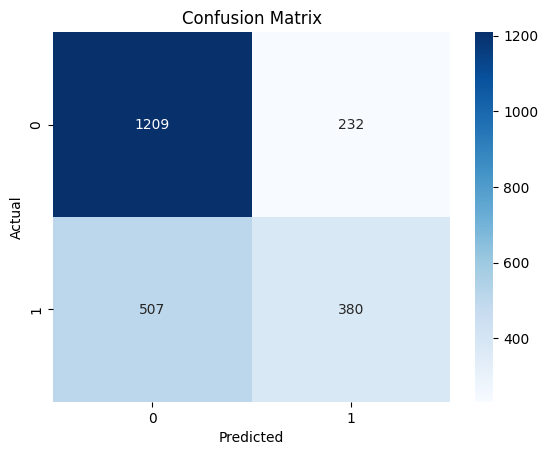

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(combined["actual"], combined["prediction"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
# Legacy visualisation removed – see multi-class section below for updated confusion matrix output.

## Multi-class kick-off style predictions


In [84]:
if "matches_model" not in globals() or "feature_cols" not in globals():
    raise RuntimeError("Run the feature-engineering cells above to build matches_model and feature_cols before training the multi-class model.")

home_rows_full = matches_rolling[matches_rolling["venue_code"] == 0].copy()
home_rows_full["result_label"] = home_rows_full["team_result"].map({"W": 0, "D": 1, "L": 2})

home_rows = matches_model[matches_model["venue_code"] == 0].copy()
home_rows["result_label"] = home_rows["team_result"].map({"W": 0, "D": 1, "L": 2})

parity_specs = [
    ("season_points_to_date", "opp_season_points_to_date", "season_points_gap"),
    ("season_goal_diff_to_date", "opp_season_goal_diff_to_date", "season_goal_diff_gap"),
    ("season_points_rate", "opp_season_points_rate", "season_points_rate_gap"),
    ("matches_played", "opp_matches_played", "matches_played_gap")
]
for left, right, new_name in parity_specs:
    home_rows[new_name] = home_rows[left] - home_rows[right]

multiclass_extra_features = [spec[2] for spec in parity_specs]
multiclass_feature_cols = [col for col in feature_cols if col != "venue_code"] + multiclass_extra_features
len(multiclass_feature_cols)


71

In [85]:
multi_split_date = "2017-01-01"
multiclass_train = home_rows[home_rows["Date"] < multi_split_date].copy()
multiclass_test = home_rows[home_rows["Date"] >= multi_split_date].copy()

class_counts = multiclass_train["result_label"].value_counts().sort_index()
num_classes = class_counts.shape[0]
train_size = len(multiclass_train)
class_weight_map = {
    cls: train_size / (num_classes * count) for cls, count in class_counts.items()
}
multiclass_train_weights = multiclass_train["result_label"].map(class_weight_map)

class_counts, class_weight_map


(result_label
 0    2816
 1    1544
 2    1699
 Name: count, dtype: int64,
 {0: 0.7172111742424242, 1: 1.3080742659758204, 2: 1.1887384736119286})

In [86]:
multiclass_predictors = multiclass_feature_cols
len(multiclass_predictors)


71

In [87]:
multi_model = xgb.XGBClassifier(
    n_estimators=800,
    max_depth=6,
    learning_rate=0.04,
    subsample=0.85,
    colsample_bytree=0.9,
    min_child_weight=4,
    reg_lambda=1.2,
    reg_alpha=0.2,
    gamma=0.25,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

multi_model.fit(
    multiclass_train[multiclass_predictors],
    multiclass_train["result_label"],
    sample_weight=multiclass_train_weights
)

multi_probs = multi_model.predict_proba(multiclass_test[multiclass_predictors])
multi_preds = multi_probs.argmax(axis=1)

multi_model


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [88]:
multi_acc = accuracy_score(multiclass_test["result_label"], multi_preds)
multi_logloss = log_loss(multiclass_test["result_label"], multi_probs)

{
    "accuracy": multi_acc,
    "log_loss": multi_logloss
}


{'accuracy': 0.4984709480122324, 'log_loss': 1.0683297764236899}

In [89]:
print(
    classification_report(
        multiclass_test["result_label"],
        multi_preds,
        target_names=["Home Win", "Draw", "Away Win"]
    )
)


              precision    recall  f1-score   support

    Home Win       0.57      0.66      0.61       447
        Draw       0.23      0.12      0.16       238
    Away Win       0.49      0.57      0.52       296

    accuracy                           0.50       981
   macro avg       0.43      0.45      0.43       981
weighted avg       0.46      0.50      0.47       981



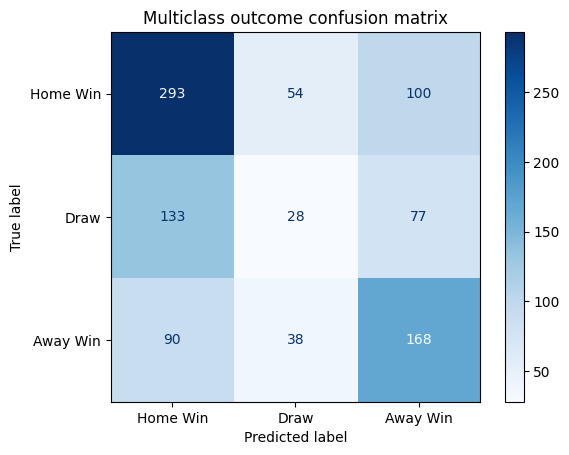

,Pred Home,Pred Draw,Pred Away
Actual Home,65.5,12.1,22.4
Actual Draw,55.9,11.8,32.4
Actual Away,30.4,12.8,56.8


In [90]:
cm = confusion_matrix(multiclass_test["result_label"], multi_preds)
cm_percent = (cm / cm.sum(axis=1, keepdims=True) * 100).round(1)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Home Win", "Draw", "Away Win"]
)
disp.plot(cmap="Blues")
plt.title("Multiclass outcome confusion matrix")
plt.show()

pd.DataFrame(
    cm_percent,
    columns=["Pred Home", "Pred Draw", "Pred Away"],
    index=["Actual Home", "Actual Draw", "Actual Away"]
)


In [91]:
prob_cols = ["home_win_pct", "draw_pct", "away_win_pct"]
prob_df = pd.DataFrame(multi_probs, columns=prob_cols)
prob_df = (prob_df * 100).round(2)

outcome_lookup = {0: "Home Win", 1: "Draw", 2: "Away Win"}

multi_results = multiclass_test.reset_index(drop=True)[["Date", "Team", "Opponent", "result_label"]].copy()
multi_results = multi_results.rename(columns={"Team": "HomeTeam", "Opponent": "AwayTeam"})
multi_results[prob_cols] = prob_df
multi_results["predicted_outcome"] = pd.Series(multi_preds).map(outcome_lookup)
multi_results["actual_outcome"] = multi_results["result_label"].map(outcome_lookup)

multi_results.head()


,Date,HomeTeam,AwayTeam,result_label,home_win_pct,draw_pct,away_win_pct,predicted_outcome,actual_outcome
0,2017-01-01,Arsenal,Crystal Palace,0,79.339996,7.410000,13.250000,Home Win,Home Win
1,2017-01-01,Watford,Tottenham,2,21.150000,19.240000,59.610001,Away Win,Away Win
2,2017-01-02,Man United,Hull,1,63.180000,32.730000,4.090000,Home Win,Draw
3,2017-01-02,Stoke,Everton,1,21.610001,39.939999,38.450001,Draw,Draw
4,2017-01-02,West Ham,Man City,2,20.299999,48.410000,31.290001,Draw,Away Win


In [92]:
def predict_match_outcome(home_team: str, away_team: str, match_date: str | None = None):
    """
    Predict the outcome probabilities for a specific fixture.

    Parameters
    ----------
    home_team : str
        Name of the home team.
    away_team : str
        Name of the away team.
    match_date : str | None
        Optional ISO date string. If provided, selects the closest fixture on or after
        that date. Otherwise the most recent historical match between the two teams is used.
    """
    if "home_rows_full" not in globals():
        raise RuntimeError("Please run the feature engineering cells to populate home_rows_full before calling this helper.")

    def _filter_candidates(df):
        mask = (
            (df["Team"].str.lower() == home_team.lower()) & (df["Opponent"].str.lower() == away_team.lower())
        )
        return df.loc[mask].copy()

    candidates = _filter_candidates(home_rows)
    backup_candidates = _filter_candidates(home_rows_full)

    if match_date:
        match_date = pd.to_datetime(match_date)
        candidates = candidates[candidates["Date"] >= match_date]
        backup_candidates = backup_candidates[backup_candidates["Date"] >= match_date]

    if candidates.empty and backup_candidates.empty:
        raise ValueError(f"No fixtures for {home_team} vs {away_team} in the available dataset.")

    source = candidates if not candidates.empty else backup_candidates
    latest_fixture = source.sort_values("Date").tail(1).copy()
    used_backup = candidates.empty

    latest_fixture = latest_fixture.fillna(0)
    fixture_probs = multi_model.predict_proba(latest_fixture[multiclass_predictors])
    fixture_prob_df = pd.DataFrame(fixture_probs, columns=prob_cols)
    fixture_prob_df = (fixture_prob_df * 100).round(2)
    fixture_pred_idx = fixture_probs.argmax(axis=1)

    fixture_display = latest_fixture[["Date", "Team", "Opponent", "result_label"]].rename(
        columns={"Team": "HomeTeam", "Opponent": "AwayTeam"}
    ).reset_index(drop=True)
    fixture_display[prob_cols] = fixture_prob_df.values
    fixture_display["predicted_outcome"] = pd.Series(fixture_pred_idx).map(outcome_lookup)
    fixture_display["actual_outcome"] = fixture_display["result_label"].map(outcome_lookup)
    if used_backup:
        fixture_display["note"] = "Row constructed from full history (possible NA fill)."

    return fixture_display


In [93]:
multi_results.sort_values("Date").tail()


,Date,HomeTeam,AwayTeam,result_label,home_win_pct,draw_pct,away_win_pct,predicted_outcome,actual_outcome
972,2020-11-01,Chelsea,Burnley,0,42.080002,47.57,10.350000,Draw,Home Win
974,2020-11-01,Everton,Brighton,0,35.279999,22.52,42.200001,Away Win,Home Win
978,2020-11-01,Wolves,Newcastle,1,31.430000,19.43,49.139999,Away Win,Draw
979,2020-12-01,Aston Villa,Man City,2,21.059999,49.34,29.600000,Draw,Away Win
980,2020-12-01,Bournemouth,Watford,2,9.310000,39.75,50.930000,Away Win,Away Win


In [94]:
fixture_candidates = home_rows[
    (
        (home_rows["Team"] == "Liverpool") & (home_rows["Opponent"] == "Man United")
    ) |
    (
        (home_rows["Team"] == "Man United") & (home_rows["Opponent"] == "Liverpool")
    )
].copy()

from IPython.display import display

backup_candidates = home_rows_full[
    (
        (home_rows_full["Team"] == "Liverpool") & (home_rows_full["Opponent"] == "Man United")
    ) |
    (
        (home_rows_full["Team"] == "Man United") & (home_rows_full["Opponent"] == "Liverpool")
    )
].copy()

try:
    fixture_display = predict_match_outcome("Liverpool", "Man United")
    display(fixture_display)
except ValueError as exc:
    print(exc)


,Date,HomeTeam,AwayTeam,result_label,home_win_pct,draw_pct,away_win_pct,predicted_outcome,actual_outcome
0,2020-01-19,Liverpool,Man United,0,67.610001,22.85,9.54,Home Win,Home Win
